# 02 SVM

## 01 Import Libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
iris = pd.read_csv("/content/drive/MyDrive/Machine Learning /datasets/02_iris.csv")
iris


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
iris.rename(columns={'variety': 'class'}, inplace=True)
iris

,sepal.length,sepal.width,petal.length,petal.width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,class
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3
149,5.9,3.0,5.1,1.8,3


### Envoding Class Variables
Setosa - 1

Versicolor - 2

Virginica - 3

In [ ]:
#Encoding the categorical column
iris = iris.replace({"class":  {
                                 "Setosa":1,
                                 "Versicolor":2,
                                 "Virginica":3
                               }
                     })
#Visualize the new dataset
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,class
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3
149,5.9,3.0,5.1,1.8,3


In [ ]:
iris.isnull() ##3 find null values
print(iris.isnull().sum())

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
class           0
dtype: int64


Text(0.5, 1.0, 'Correlation On iris Classes')

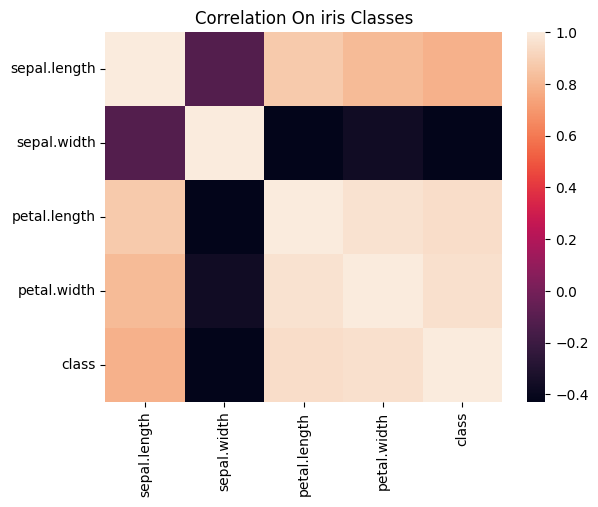

In [ ]:
plt.figure(1)
sns.heatmap(iris.corr())              ### +1 and -1
plt.title('Correlation On iris Classes')

In [ ]:
iris.corr() ### +1 and -1
	# 1.000	0.871....
  # As sepal length increases, petal length also tends to increase — quite strongly.
  #As sepal width increases, petal length tends to decrease — moderately, but not strongly.
  # compare one col with other every time..when corr with itself...it gives 1

,sepal.length,sepal.width,petal.length,petal.width,class
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal.length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal.width,0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

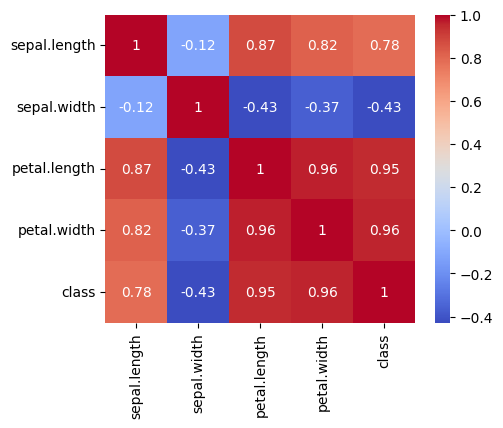

In [ ]:
corr = iris.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

## 03 Model


In [ ]:
# X = iris.iloc[:,:-1] #selects all cols except the class target
# y = iris.iloc[:, -1].values #selects the last

y = iris['class']
X = iris.drop('class', axis=1)
  ###150     25% testing and 75% samples used for training

##Train test split of dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Creating the SVM model
#Create the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
# classifier = SVC(kernel = 'rbf', random_state = 0)
#Fit the model for the data

classifier.fit(X_train, y_train) ### training of the model on dataset(training samples)


#Make the prediction// model trained testing on samples (test)
y_pred = classifier.predict(X_test)

y_trainp=classifier.predict(X_train)


In [ ]:
# prompt: in svc do we need ytrain predicted value and ytest predicted value

from sklearn.metrics import confusion_matrix, accuracy_score
###Testing accuracy of  model


cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) # 10 folds


print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # perform mean of all 10 folds
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("Accuracy of the model is: ", accuracy_score(y_test, y_pred))
print("Training Accuracy:", accuracy_score(y_train, y_trainp))


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 98.18 %
Standard Deviation: 3.64 %
Accuracy of the model is:  0.9736842105263158
Training Accuracy: 0.9821428571428571


And finally for check the acurracy of the model , we’ll use the confusion matrix and the cross validation

In [ ]:
print("Train score : ",classifier.score(X_train, y_train))
print("Test score : ",classifier.score(X_test, y_test))

Train score :  0.9821428571428571
Test score :  0.9736842105263158


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 98.18 %
Standard Deviation: 3.64 %


### prompt: what does the confuzion matrix represent ..meaning of it in the iris

The confusion matrix is a table that visualizes the performance of a classification model.
In the context of the Iris dataset, where you're classifying flowers into three species
 (Setosa, Versicolor, and Virginica), the confusion matrix shows h
how many data points were correctly classified into each species and how many were misclassified into other species.


|                        | Predicted Setosa | Predicted Versicolor | Predicted Virginica |
|------------------------|------------------|-----------------------|----------------------|
| **Actual Setosa**      | 13               | 0                     | 0                    |
| **Actual Versicolor**  | 0                | 15                    | 1                    |
| **Actual Virginica**   | 0                | 0                     | 9                    |



In [ ]:

###Training accuracy of  model

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_train, y_trainp)
print(cm1)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[37  0  0]
 [ 0 32  2]
 [ 0  0 41]]
Accuracy: 98.18 %
Standard Deviation: 3.64 %


## Generalizattion

In [ ]:
# prompt: show some example input prediction

# Example input prediction (assuming you have a trained model 'classifier')

# Example input features (replace with actual values)
example_input = [[5.1, 3.5, 1.4, 0.2],  # Example 1
                 [6.3, 2.9, 5.6, 1.8],  # Example 2
                 [7.7, 3.0, 6.1, 2.3]] # Example 3


# Make predictions
predictions = classifier.predict(example_input)

# Print the predictions
# Loop through each prediction
for i in range(len(predictions)):
    print("Input", i+1, ":", example_input[i], "=> Predicted Class:", predictions[i])


Input 1 : [5.1, 3.5, 1.4, 0.2] => Predicted Class: 1
Input 2 : [6.3, 2.9, 5.6, 1.8] => Predicted Class: 3
Input 3 : [7.7, 3.0, 6.1, 2.3] => Predicted Class: 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


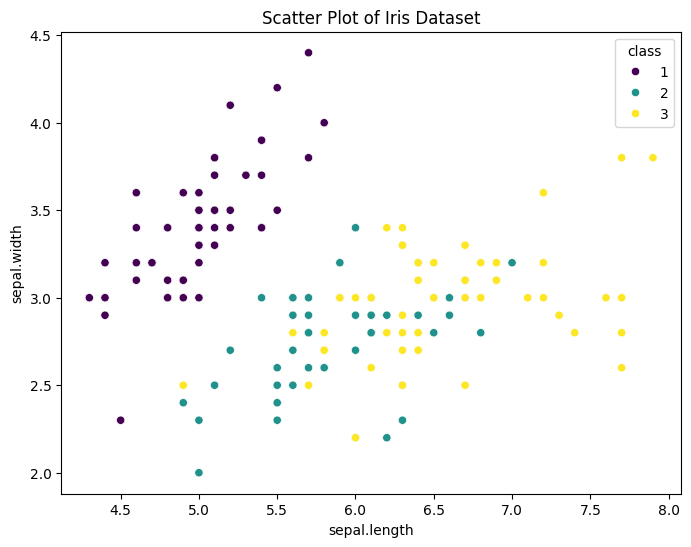

In [ ]:
# prompt: plot scatterplot of iris

# Assuming 'iris' DataFrame is already loaded and preprocessed as in the provided code.

# Select features for the scatter plot
features = ['sepal.length', 'sepal.width']

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x=features[0], y=features[1], hue='class', palette='viridis')
plt.title('Scatter Plot of Iris Dataset')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()
